In [1]:
#IMPORTANJE
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#UCITAVANJE PODATAKA
data = pd.read_csv("zgrade_sarajevo.csv")
# prikaz prvih 10 redova
data.head(100)

,grad,kvadrata,sprat,broj_soba,vrsta_grijanja,lift,parking,novogradnja,namjesten,cijena
0,Sarajevo - Stari Grad,57.00,4,2,centralno,0,0,0,2,342000
1,Sarajevo - Novi Grad,33.00,5,0,centralno,1,1,1,1,198000
2,Sarajevo - Novo Sarajevo,55.35,2,2,centralno,1,0,0,2,325000
3,Ilidža,42.00,6,2,ostalo,1,0,1,2,243600
4,Ilidža,42.00,2,1.5,struja,1,1,1,2,242960
...,...,...,...,...,...,...,...,...,...,...
95,Sarajevo - Centar,63.00,2,3,plin,1,1,0,2,299000
96,Sarajevo - Novi Grad,59.00,2,3,centralno,1,1,0,2,280000
97,Ilidža,51.25,5,2,centralno,1,1,1,2,243150
98,Ilidža,76.00,2,3,centralno,1,1,0,2,360000


Prvo ćemo uraditi OneHot encoding na gradove i vrste grijanja jer su mi to jedine kategoričke varijable.

In [3]:
#SREDIVANJE KATEGORICKIH VARIJABLI
heating_status = pd.get_dummies(data['vrsta_grijanja'])
data = pd.concat([data, heating_status], axis = 1)
data.drop(['vrsta_grijanja'], axis = 1, inplace = True)

cities_status = pd.get_dummies(data['grad'])
data = pd.concat([data, cities_status], axis = 1)
data.drop(['grad'], axis = 1, inplace = True)

Za spratove, pošto mnoge instance u datasetu imaju "prizemlje", "visoko", "suteren" kao sprati pošto sam poslije sa provjerom vidio da je sprat apsolutno nebitan kada se odnosi sa cijenom,
samo je bitno da li je na nekom spratu ili je neka od "prizemlje", "visoko", "suteren", ako je neka od ove tri inače je niža cijena pa stavio sam da mi je sprat 1 ako je sprat a inače da je 0

In [4]:
#PRETVARANJE U BROJEVE
def sprat_map(x):
    if x in ["prizemlje", "suteren", "visoko"]:
        return 0
    if x == "20+":
        return 20
    return x


def soba_map(x):
    if x == "četverosoban":
        return 4
    return float(x)


data["sprat"] = data["sprat"].apply(sprat_map)
data["broj_soba"] = data["broj_soba"].apply(soba_map)

Pošto sam za mnoge zgrade vidio da nemaju naznaku za lift, ako je na primjer neboder onda sam za zgrade sa više od 4 sprata stavio da ima lift.

In [5]:
#POSTAVLJANJE LIFTA NA TRUE AKO JE BROJ SPRATOVA VECI OD 4
data['sprat'] = pd.to_numeric(data['sprat'])
data.loc[data['sprat'] > 4, 'lift'] = 1
def poboljsanje(x):
    if x == 0:
        return 0
    return 1

data["sprat"] = data["sprat"].apply(poboljsanje)
data.head(100)


,kvadrata,sprat,broj_soba,lift,parking,novogradnja,namjesten,cijena,centralno,drva,...,plin,struja,Hadžići,Ilidža,Sarajevo - Centar,Sarajevo - Novi Grad,Sarajevo - Novo Sarajevo,Sarajevo - Stari Grad,Trnovo,Vogošća
0,57.00,1,2.0,0,0,0,2,342000,1,0,...,0,0,0,0,0,0,0,1,0,0
1,33.00,1,0.0,1,1,1,1,198000,1,0,...,0,0,0,0,0,1,0,0,0,0
2,55.35,1,2.0,1,0,0,2,325000,1,0,...,0,0,0,0,0,0,1,0,0,0
3,42.00,1,2.0,1,0,1,2,243600,0,0,...,0,0,0,1,0,0,0,0,0,0
4,42.00,1,1.5,1,1,1,2,242960,0,0,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,63.00,1,3.0,1,1,0,2,299000,0,0,...,1,0,0,0,1,0,0,0,0,0
96,59.00,1,3.0,1,1,0,2,280000,1,0,...,0,0,0,0,0,1,0,0,0,0
97,51.25,1,2.0,1,1,1,2,243150,1,0,...,0,0,0,1,0,0,0,0,0,0
98,76.00,1,3.0,1,1,0,2,360000,1,0,...,0,0,0,1,0,0,0,0,0,0


Vidimo da sve sem parkinga i lifta poprilično utječe na cijenu ali i dalje i parking i lift dovoljno utječu da se razmatraju.

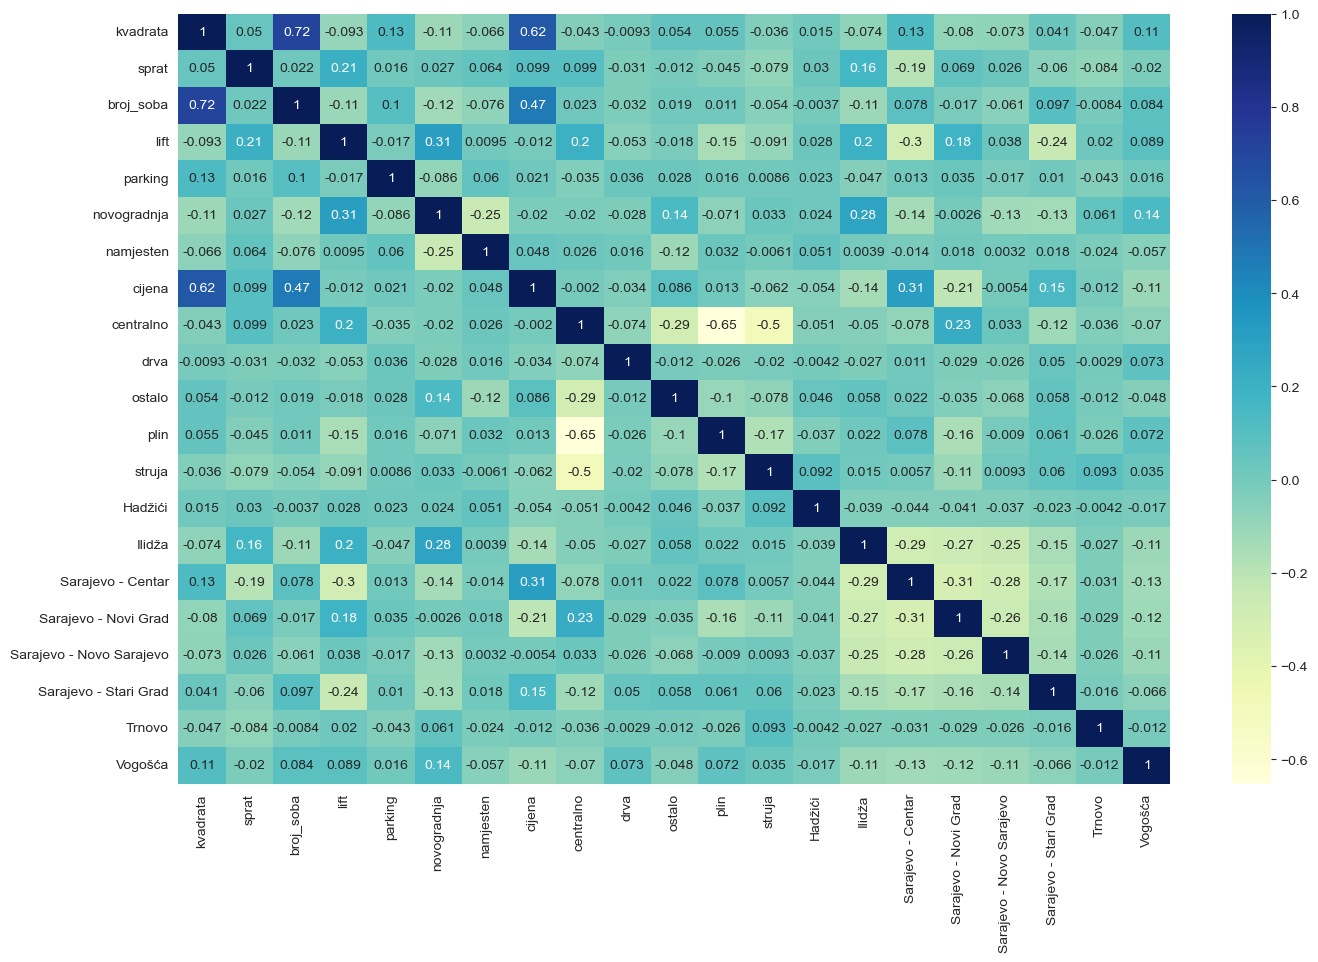

In [6]:
plt.figure(figsize = (16, 10))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.show()

Ovdje sam radio split na trening, test i validation, ali split je morao biti takav da za svaki dio Sarajeva posebno uradim split (pošto ilijaš ima samo 2 stana na OLX morao sam ga ukloniti iz dataseta).
Taj split je 0.8 na trening_i_validaciju, 0.2 na test i onda trening_i_validaciju splitam na 0.8 za trening a 0.2 za validaciju.

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

train_data = []
test_data = []
valid_data=[]
Y_valid=[]
Y_train = []
Y_test = []

gradovi=['Vogošća', 'Sarajevo - Stari Grad', 'Ilidža', 'Sarajevo - Novi Grad',
           'Sarajevo - Centar', 'Sarajevo - Novo Sarajevo', 'Trnovo', 'Ilijaš', 'Hadžići']

for grad in data.columns:
    if grad in gradovi:
        grad_data = data[data[grad] == 1]

        X_city = grad_data.drop('cijena', axis=1)
        y_city = grad_data['cijena']
        X_train_and_valid_city, X_test_city, Y_train_and_valid_grad, Y_test_grad = train_test_split(
            X_city, y_city,
            test_size=0.2,
            random_state=42
        )

        print(X_train_and_valid_city.shape)
        print(grad)

        X_train_city, X_valid_city, Y_train_grad, Y_valid_grad = train_test_split(
            X_train_and_valid_city, Y_train_and_valid_grad,
            test_size=0.2,
            random_state=42
        )

        train_data.append(X_train_city)
        test_data.append(X_test_city)
        valid_data.append(X_valid_city)
        Y_valid.append(Y_valid_grad)
        Y_train.append(Y_train_grad)
        Y_test.append(Y_test_grad)

X_train = pd.concat(train_data)
X_test = pd.concat(test_data)
X_valid = pd.concat(valid_data)
Y_train = pd.concat(Y_train)
Y_test = pd.concat(Y_test)
Y_valid = pd.concat(Y_valid)


(4, 20)
Hadžići
(165, 20)
Ilidža
(200, 20)
Sarajevo - Centar
(183, 20)
Sarajevo - Novi Grad
(156, 20)
Sarajevo - Novo Sarajevo
(66, 20)
Sarajevo - Stari Grad
(2, 20)
Trnovo
(38, 20)
Vogošća


Ovdje provjeravam da su veoma slične korelacije izmešu trening i testnog skupa.

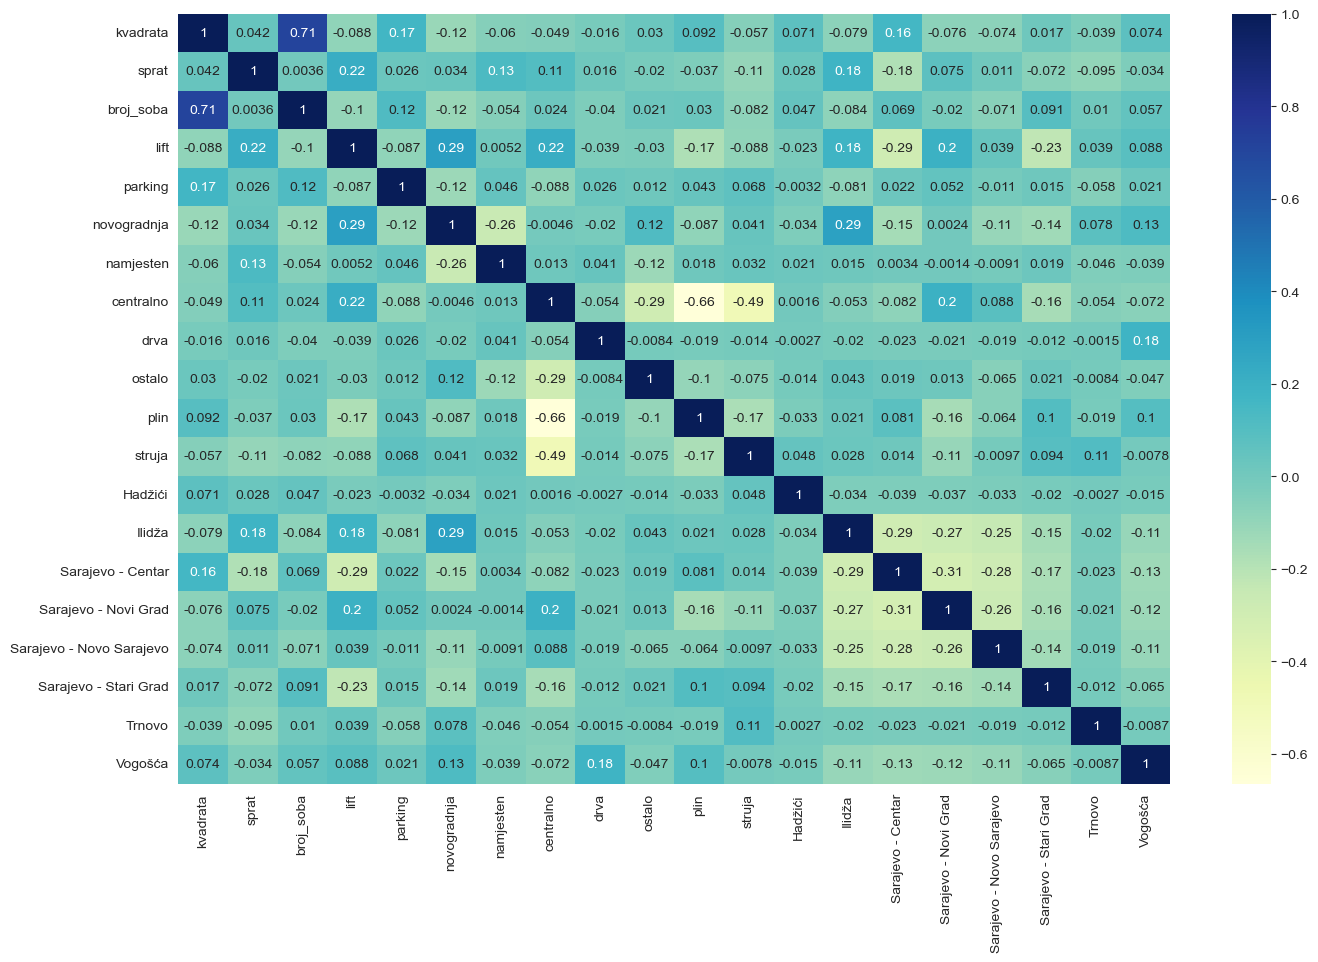

In [8]:
plt.figure(figsize = (16, 10))
sns.heatmap(X_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

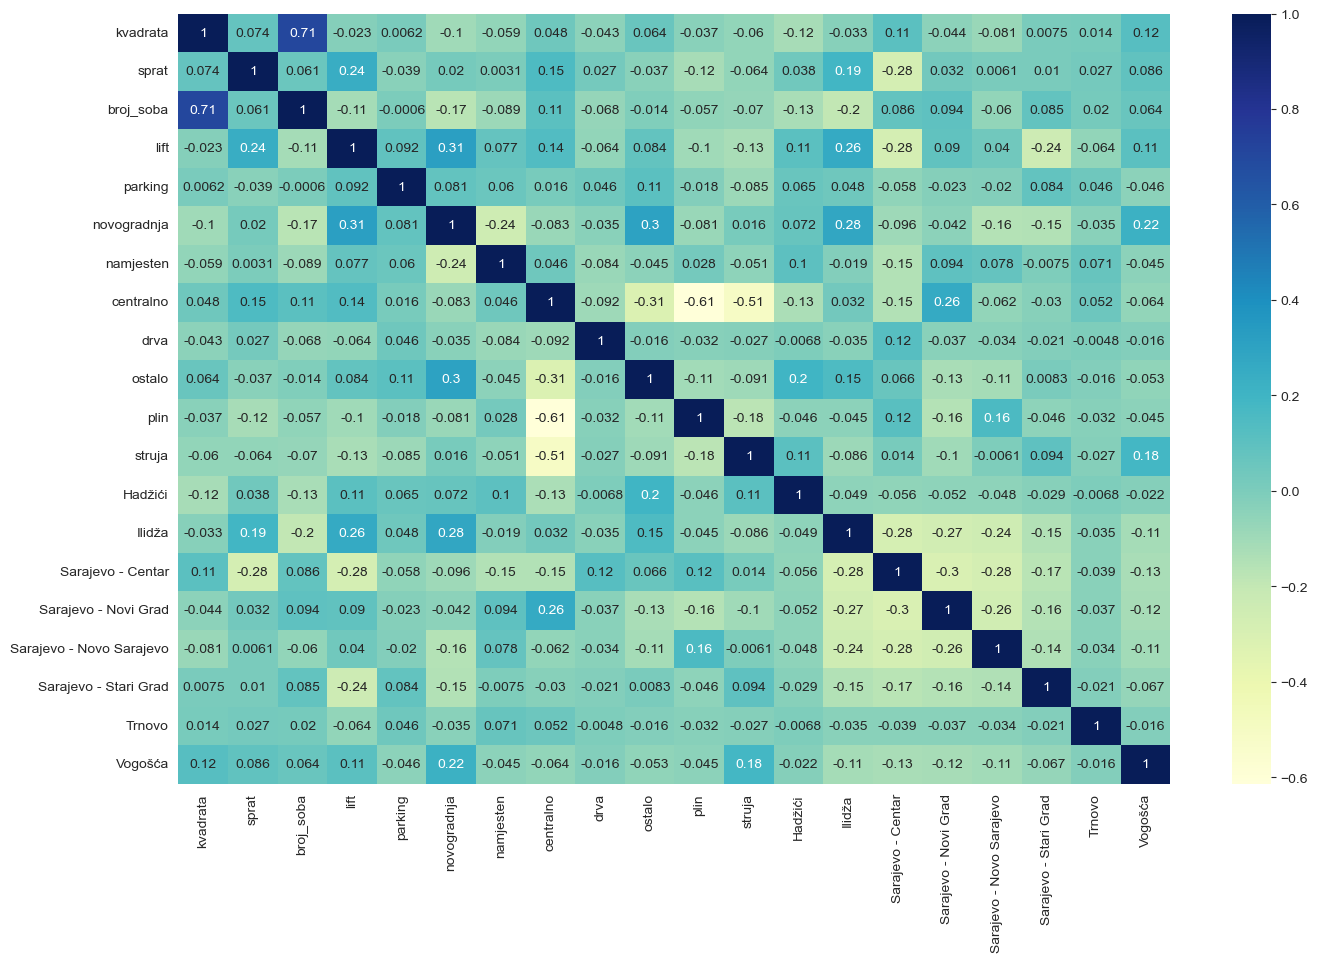

In [9]:
plt.figure(figsize = (16, 10))
sns.heatmap(X_test.corr(), annot = True, cmap="YlGnBu")
plt.show()

Ovdje vidimo da su trening i test splitovi veoma slični

In [10]:
from scipy import stats
print(stats.describe(pd.to_numeric(Y_train)))
print(stats.describe(pd.to_numeric(Y_test)))

DescribeResult(nobs=648, minmax=(150000, 399900), mean=251090.9398148148, variance=4365594630.928366, skewness=0.45646967674069766, kurtosis=-0.7633281077118523)
DescribeResult(nobs=209, minmax=(151500, 399999), mean=248200.58851674641, variance=4426977436.1856365, skewness=0.44326581607368165, kurtosis=-0.947340522869379)


Ovdje proširim testni dataset, povečam ga 5 puta, pokušavao sam i više i manje ali ovaj broj mi daje najbolji rezultat za linearnu regresiju pa mislim da zbog toga
najbolje predstavlja dataset.

In [11]:
#Proširivanje dataseta
X_train = np.array(X_train)
Y_train = np.array(Y_train)

for i in range(len(X_train)):
    cjena_po_kvadratu = Y_train[i]/X_train[i][0]
    for j in range(-2, 4):
        if j != 0:
            nova_zgrada = X_train[i].copy()
            nova_zgrada[0] += j
            nova_cjena = nova_zgrada[0] * cjena_po_kvadratu
            X_train = np.concatenate((X_train, [nova_zgrada]))
            Y_train = np.concatenate((Y_train, [nova_cjena]))


X_test = X_test.values
Y_test = Y_test.values
Y_valid = Y_valid.values
X_valid = np.array(X_valid)



Primjetio sam da mi je neuralna mreža bila nerealno dobra, pa sam provjeravao kakav mi je split i primjetio sam da ovom generacijom generišem oko 100 instanci koje su iste kao u testnom skupu
pa njih uklonim.

In [12]:
brojac = 0
index = []
for i in range(len(X_train)):
    for j in range(len(X_test)):
        isti = True
        for k in range(20):
            if X_train[i][k] != X_test[j][k]:
                isti = False
        if isti:
            brojac += 1
            index.append(i)

print(brojac)

105


In [13]:
X_train = np.delete(X_train, index, axis =0)
Y_train = np.delete(Y_train, index, axis =0)
print(X_train, X_train.shape)

[[ 80.     1.     3.   ...   0.     0.     0.  ]
 [ 78.     1.     3.   ...   0.     0.     0.  ]
 [114.     1.     4.   ...   0.     0.     0.  ]
 ...
 [ 67.78   1.     3.   ...   0.     0.     1.  ]
 [ 68.78   1.     3.   ...   0.     0.     1.  ]
 [ 69.78   1.     3.   ...   0.     0.     1.  ]] (3783, 20)


Sada se uvjerim da nema istih

In [14]:
brojac = 0
index = []
for i in range(len(X_train)):
    for j in range(len(X_test)):
        isti = True
        for k in range(20):
            if X_train[i][k] != X_test[j][k]:
                isti = False
        if isti:
            brojac += 1
            index.append(i)

print(brojac)

0


Koristio sam oba skejlara i primjetio da je minmaxScaler bolji pa njega koristim.

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

train_std_scaler = StandardScaler()
X_train_std = train_std_scaler.fit_transform(X_train)
X_test_std = train_std_scaler.transform(X_test)

train_minmax_scaler = MinMaxScaler()
train_minmax_scaler = train_minmax_scaler.fit(X_train)
X_train_minmax = train_minmax_scaler.transform(X_train)
X_test_minmax = train_minmax_scaler.transform(X_test)
X_valid_minmax= train_minmax_scaler.transform(X_valid)


train_minmax_scaler = MinMaxScaler()
train_minmax_scaler.fit(Y_train.reshape(-1,1))
Y_train_minmax = train_minmax_scaler.transform(Y_train.reshape(-1,1))
Y_test_minmax = train_minmax_scaler.transform(Y_test.reshape(-1,1))
Y_valid_minmax = train_minmax_scaler.transform(Y_valid.reshape(-1,1))



Vidimo da obična linearna regresija daje fenomenalan rezultat

In [16]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train_minmax, Y_train_minmax)

LinearRegression()

In [17]:
from sklearn.metrics import mean_absolute_error
Y_train_pred = train_minmax_scaler.inverse_transform(lin_reg.predict(X_train_minmax))
print(mean_absolute_error(Y_train, Y_train_pred))
Y_test_pred = train_minmax_scaler.inverse_transform(lin_reg.predict(X_test_minmax))
print(mean_absolute_error(Y_test, Y_test_pred))

33756.85911278818
32540.88985046214


Ova neuralna mreža daje dobar rezultat, prvo postavim težine na nasumične vrijednost, zatim koristim regularzaciju L2, pokušao sam Dropout ali mi to uporpasti
mrežu, previše generalizira mreža i onda slabija bude od linearne regresije. Na izlazu moram koristi sigmoid jer su mi sve vrjednosti od 0 do 1 a ako koristim RELU
za aktivacijsku funckiju zakonvergira odma tako što sve vrjednosti stavi na 1. Pa sam svugdje za aktivacijsku funkciju koristio RELU. Da bi još malo poboljšo mrežu
smanjujem learning rate kada zaglavi u učenju i dobijem solidan rezultat.

In [18]:
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf


alpha = 0.0001
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=1e-12)
init = tf.keras.initializers.RandomUniform(minval=-0.5, maxval=0.5, seed=42)
neuralna_mreza = tf.keras.models.Sequential([
    tf.keras.layers.Dense(500, input_shape=(20,), kernel_initializer=init, activation="sigmoid", kernel_regularizer=tf.keras.regularizers.L2(alpha)),
    tf.keras.layers.Dense(500, kernel_initializer=init, activation="sigmoid", kernel_regularizer=tf.keras.regularizers.L2(alpha)),
    tf.keras.layers.Dense(500, kernel_initializer=init, activation="sigmoid", kernel_regularizer=tf.keras.regularizers.L2(alpha)),
    tf.keras.layers.Dense(1,activation="sigmoid"),
])

neuralna_mreza.compile(optimizer='adam',
              loss=tf.keras.losses.mean_absolute_error,
              metrics=['accuracy'])

history = neuralna_mreza.fit(X_train_minmax, Y_train_minmax, batch_size=10, epochs=400, validation_data=(X_valid_minmax, Y_valid_minmax), callbacks=[reduce_lr])




Epoch 1/400
379/379 [==============================] - 2s 2ms/step - loss: 1608.9857 - accuracy: 5.2868e-04 - val_loss: 1520.8707 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 2/400
379/379 [==============================] - 1s 2ms/step - loss: 1439.2429 - accuracy: 5.2868e-04 - val_loss: 1359.7076 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 3/400
379/379 [==============================] - 1s 2ms/step - loss: 1285.8801 - accuracy: 5.2868e-04 - val_loss: 1213.9354 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 4/400
379/379 [==============================] - 1s 2ms/step - loss: 1147.0039 - accuracy: 5.2868e-04 - val_loss: 1081.7972 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 5/400
379/379 [==============================] - 1s 2ms/step - loss: 1021.0977 - accuracy: 5.2868e-04 - val_loss: 961.9719 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 6/400
379/379 [==============================] - 1s 2ms/step - loss: 906.8656 - accuracy: 5.2868e-04 - val_loss: 853.1993 - val_accuracy: 0.0000e

In [19]:
from sklearn.metrics import mean_absolute_error
Y_train_pred = train_minmax_scaler.inverse_transform(neuralna_mreza.predict(X_train_minmax))
print(mean_absolute_error(Y_train, Y_train_pred))
Y_test_pred = train_minmax_scaler.inverse_transform(neuralna_mreza.predict(X_test_minmax))
print(mean_absolute_error(Y_test, Y_test_pred))
print("Predikcija: ", 100 - round((mean_absolute_error(Y_test, Y_test_pred))/Y_test.mean() * 100, 4), "%" )

119/119 [==============================] - 0s 612us/step
23170.2294760336
7/7 [==============================] - 0s 833us/step
26391.047772129186
Predikcija:  89.367 %


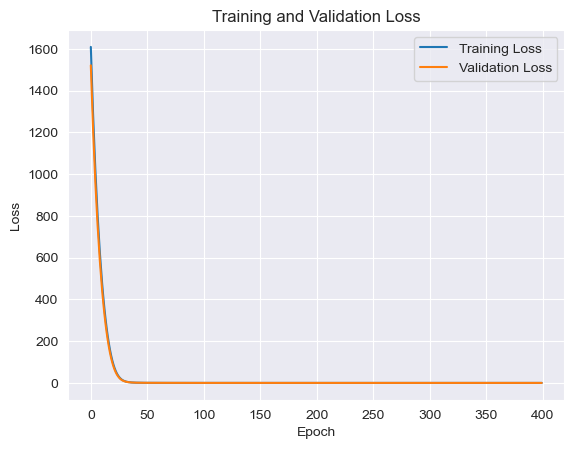

In [20]:
plt.plot(history.history["loss"], label='Training Loss')
plt.plot(history.history["val_loss"], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()